# Analysis of Mount Barker Weather

Data provided by: Menne, Matthew J., Imke Durre, Bryant Korzeniewski, Shelley McNeal, Kristy Thomas, Xungang Yin, Steven Anthony, Ron Ray, Russell S. Vose, Byron E.Gleason, and Tamara G. Houston (2012): Global Historical Climatology Network - 
Daily (GHCN-Daily), Version 3. NOAA National Climatic Data Center. doi:10.7289/V5D21VHZ 2015.

Website: http://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/locations/CITY:AS000001/detail

Included variables:
* DATE - date of recording in format year-month-date
* PRCP - Precipitation (mm)
* TMAX - Maximum temperature (degrees C). 
* TMIN - Minimum temperature (degrees C)
* STATION and NAME - weather station information

Your task is to load data stored in the file `MountBarkerWeather.csv` and make sense of the data. For example, get descriptive statistics for temperatures and/or precipitation overall; compare the weather for different time periods; try to answer the question if there is a real climate change in South Australia. 

Also, use Python and Numpy to get a better understanding of the data itself: how long is the history of observations of precipitation and temperature (they are not the same); how many days covered, how many days missing.

It is a pain to use Numpy only for this analysis. Next week you will learn other tools to combine with Numpy. This is an exercise to test your problem solving and to learn more about vectorisation. 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [6]:
# Read in the data
df = pd.read_csv('MountBarkerWeather.csv')

In [9]:
# Check the data
df.head()


,STATION,NAME,DATE,PRCP,TMAX,TMIN
0,ASN00023733,"MOUNT BARKER, AS",1870-02-01,0.0,NaN,NaN
1,ASN00023733,"MOUNT BARKER, AS",1870-02-02,0.0,NaN,NaN
2,ASN00023733,"MOUNT BARKER, AS",1870-02-03,0.0,NaN,NaN
3,ASN00023733,"MOUNT BARKER, AS",1870-02-04,0.0,NaN,NaN
4,ASN00023733,"MOUNT BARKER, AS",1870-02-05,0.0,NaN,NaN


In [12]:
# find the maximum temperature
print(df['TMAX'].max())
# find the minimum temperature
print(df['TMIN'].min())
# find the maximum rainfall
print(df['PRCP'].max())

44.5
-5.6
129.8


In [13]:
# count all null values in PRCP
print(df['PRCP'].isnull().sum())

307


In [19]:
# describe the data rounded to 2 decimal places
df.describe().round(2)

,PRCP,TMAX,TMIN
count,50313.00,23635.00,23646.00
mean,2.06,20.24,8.40
std,5.37,6.85,4.37
min,0.00,6.70,-5.60
25%,0.00,14.70,5.50
50%,0.00,19.00,8.30
75%,1.30,24.50,11.10
max,129.80,44.50,28.60


In [18]:
# check the data types
df.info() # check the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50620 entries, 0 to 50619
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  50620 non-null  object 
 1   NAME     50620 non-null  object 
 2   DATE     50620 non-null  object 
 3   PRCP     50313 non-null  float64
 4   TMAX     23635 non-null  float64
 5   TMIN     23646 non-null  float64
dtypes: float64(3), object(3)
memory usage: 2.3+ MB


<AxesSubplot: ylabel='Frequency'>

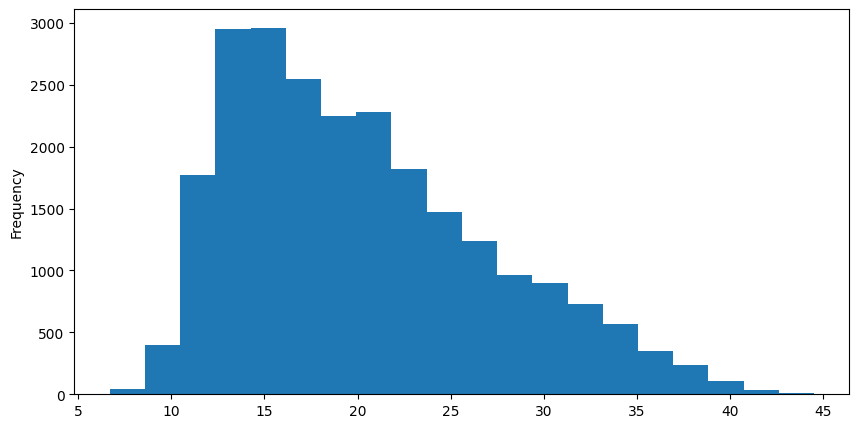

In [20]:
# plot the histogram of the maximum temperature
df['TMAX'].plot(kind='hist', bins=20, figsize=(10,5))

In [21]:
# DATE to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50620 entries, 0 to 50619
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  50620 non-null  object        
 1   NAME     50620 non-null  object        
 2   DATE     50620 non-null  datetime64[ns]
 3   PRCP     50313 non-null  float64       
 4   TMAX     23635 non-null  float64       
 5   TMIN     23646 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 2.3+ MB


In [23]:
# check the date range
print(df['DATE'].min())
print(df['DATE'].max())

1870-02-01 00:00:00
2023-02-01 00:00:00
